<font size="4"> <br><br> <center> Московский государственный технический университет им. Н.Э. Баумана <br>Факультет «Информатика и системы управления» <br> Кафедра «Автоматизированные системы обработки информации и управления»<br><br><br><br></center></font>

<center> <img src="Bauman LOGO.png" style="width:400px;height:500px;"> </center>

 <br><br><br><br><b><br><br><font size="5"><center> Отчет по лабораторной работе № 1 <br>"Разведочный анализ данных. Исследование и визуализация данных." <br><br><br> По курсу<br>“Методы машинного обучения” </center></b></font>

<font size="4"> <div style="text-align: right"> <br><br><br><br>Выполнитель:<br> Али Диб А.Ж.<br>Студент группы ИУ5-22М </div></font>

<b><font size="5"> <br><br><center>Москва, 2020</center></font></b>

<br> <br> <br> <br> <br> <br>

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных для выявления рака молочной железы
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Датасет содержит следующие колонки:
- **radius** (среднее расстояние от центра до точек по периметру)

- **texture** (стандартное отклонение значений оттенков серого)

- **perimeter**

- **area**

- **smothness** (локальное изменение длины радиуса)

- **compactness** ($\frac{периметр^{2}} {площадь - 1,0}$)

7. **concavity** (выраженность вогнутых участков контура)

8. **concave points** (количество вогнутых частей контура)

9. **symmetry**

10. **fractal dimension** («приближение береговой линии» - 1)

\
Среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее из трех самых больших значений) этих признаков были рассчитаны для каждого изображения, что дало 30 признаков. Например, поле 3 - средний радиус, поле 13 - радиус SE, поле 23 - наихудший радиус.


# Импорт библиотек
Импортируем библиотеки с помощью команды import.
Как правило, все команды import размещают в первой ячейке ноутбука

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import *

# Загрузка данных

Загрузим файлы датасета в помощью sklearn датасет.


In [2]:
cancer = load_breast_cancer()

In [3]:
for x in cancer:
    print(x)

data
target
target_names
DESCR
feature_names
filename


In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer['data'].shape

(569, 30)

In [6]:
data1=pd.DataFrame(data=np.c_[cancer['data'],cancer['target']],
                   columns = list(cancer['feature_names']) + ['target'])

In [7]:
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## 2) Основные характеристики датасета

In [8]:
# Первые 5 строк датасета
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
# Размер датасета - 8143 строк, 7 колонок
data1.shape

(569, 31)

In [10]:
total_count = data1.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 569


In [11]:
# Список колонок
data1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [12]:
# Список колонок с типами данных
data1.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [13]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

mean radius - 0
mean texture - 0
mean perimeter - 0
mean area - 0
mean smoothness - 0
mean compactness - 0
mean concavity - 0
mean concave points - 0
mean symmetry - 0
mean fractal dimension - 0
radius error - 0
texture error - 0
perimeter error - 0
area error - 0
smoothness error - 0
compactness error - 0
concavity error - 0
concave points error - 0
symmetry error - 0
fractal dimension error - 0
worst radius - 0
worst texture - 0
worst perimeter - 0
worst area - 0
worst smoothness - 0
worst compactness - 0
worst concavity - 0
worst concave points - 0
worst symmetry - 0
worst fractal dimension - 0
target - 0


In [14]:
# Основные статистические характеристки набора данных
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
#Определим уникальные значения для целевого признака
data1['target'].unique()

array([0., 1.])

Целевой признак является бинарным и содержит только значения 0 и 1.

## 3) Визуальное исследование датасета

Для визуального исследования могут быть использованы различные виды диаграмм, будет сделано только некоторые варианты диаграмм, которые используются достаточно часто.

Будет использовано две библиотеки:
- **Matplotlib**
- **Seaborn**

##  <font color=#1569C7> <u>Диаграмма рассеяния <u> </font>
    
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

\
<font color='purple'> $\Large \textbf{*Matplotlib*}$ </font>

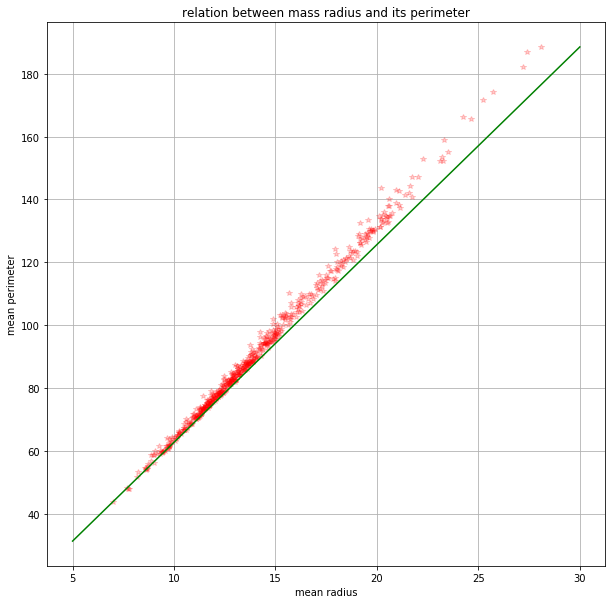

In [16]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
plt.plot(data1['mean radius'],data1['mean perimeter'],'*r',alpha=0.2)
ax.set_xlabel('mean radius')
ax.set_ylabel('mean perimeter')
ax.set_title('relation between mass radius and its perimeter')
xxx=np.linspace(5,30)
yyy=2*np.pi*xxx
plt.plot(xxx,yyy,'g')

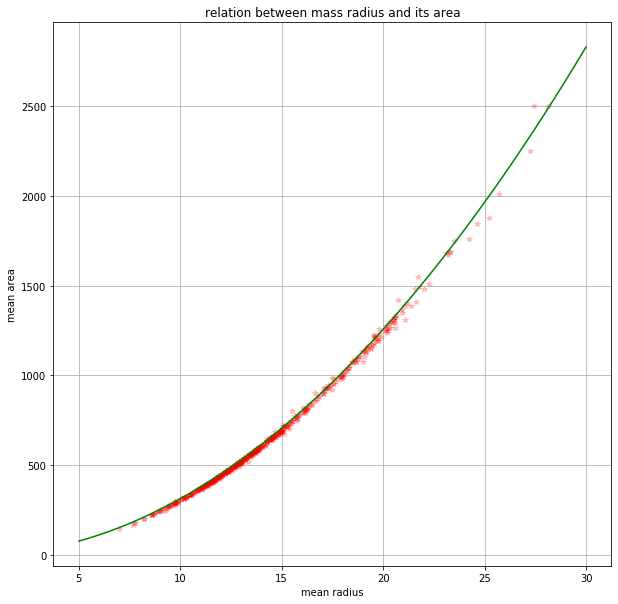

In [17]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
plt.plot(data1['mean radius'],data1['mean area'],'*r',alpha=0.2)
ax.set_xlabel('mean radius')
ax.set_ylabel('mean area')
ax.set_title('relation between mass radius and its area')
xxx=np.linspace(5,30)
yyy=np.pi*xxx**2
plt.plot(xxx,yyy,'g')

\
<font color='purple'> $\Large \textbf{*Seaborn*}$ </font>

Text(0.5, 1.0, 'relation between mass radius and its perimeter')

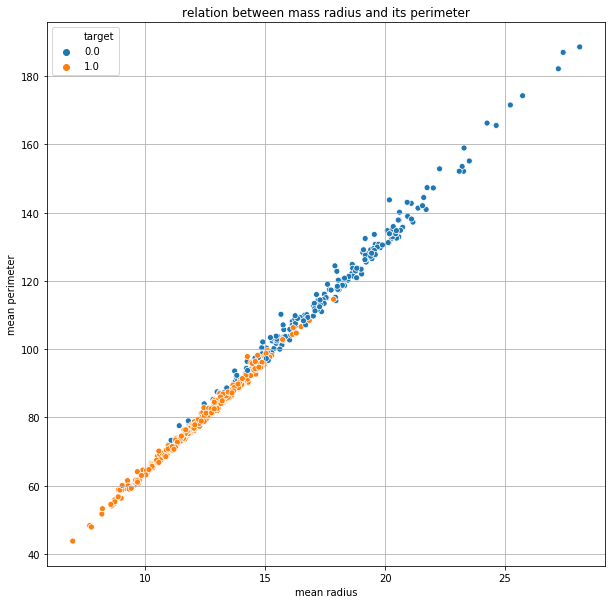

In [18]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.scatterplot(data1['mean radius'],data1['mean perimeter'],color='r',hue=data1['target'])
ax.set_title('relation between mass radius and its perimeter')

Text(0.5, 1.0, 'relation between mass radius and its area')

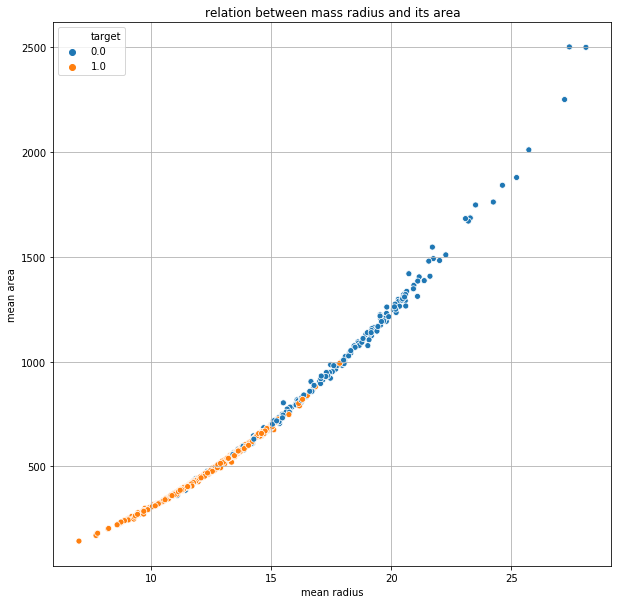

In [19]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.scatterplot(data1['mean radius'],data1['mean area'],color='r',hue=data1['target'])
ax.set_title('relation between mass radius and its area')

Можно видеть что между полями mean radius и mean perimeter пристутствует почти линейная зависимость.\
Можно видеть что между полями mean radius и mean area пристутствует почти параболическая зависимость.

##  <font color=#1569C7> <u>Гистограмма <u> </font>

Позволяет оценить плотность вероятности распределения данных.


\
<font color='purple'> $\Large \textbf{*Matplotlib*}$ </font>

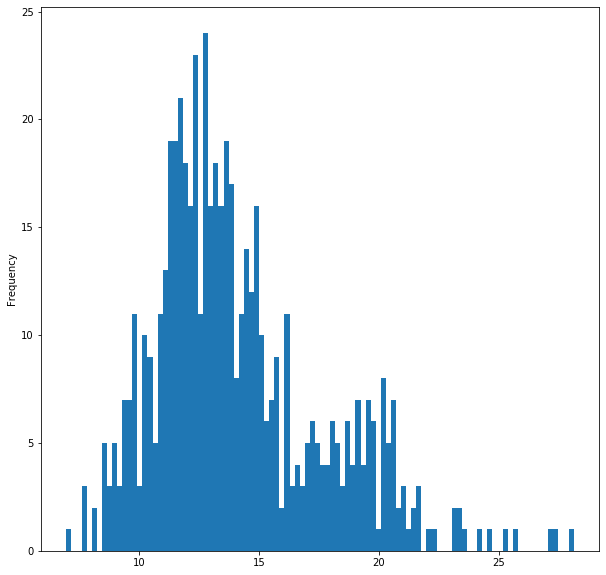

In [20]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
data1['mean radius'].plot.hist(bins=100)

\
<font color='purple'> $\Large \textbf{*Seaborn*}$ </font>

Text(0.5, 1.0, 'график плотности')

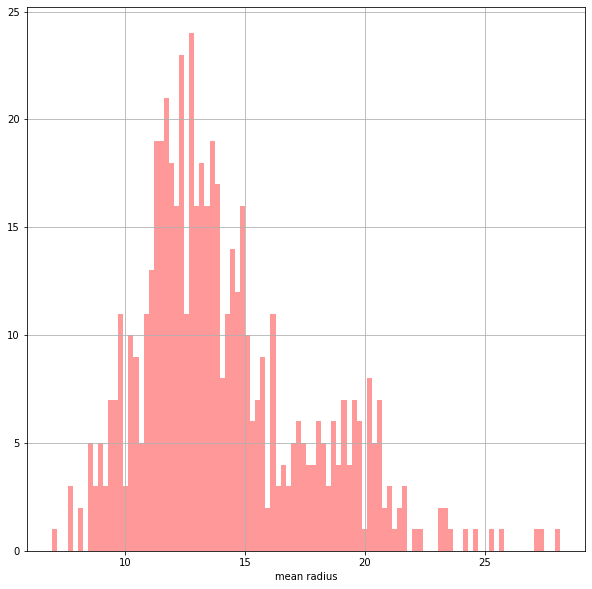

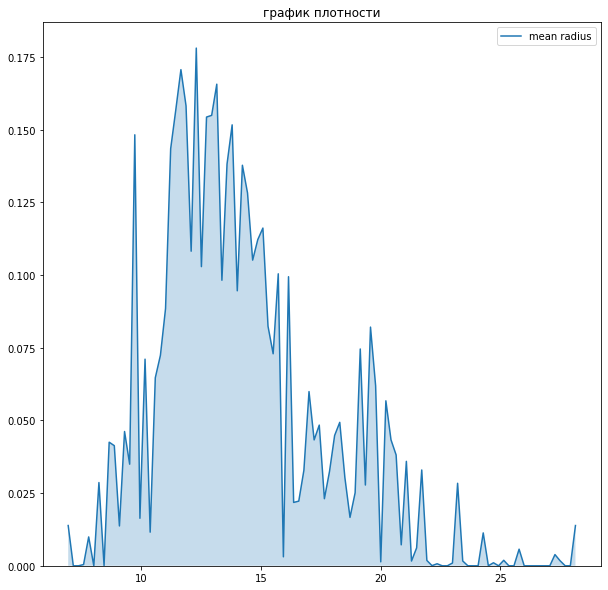

In [21]:
fig=plt.figure(1,figsize=(10,10))
ax=fig.gca()
ax.grid()
sns.distplot(data1['mean radius'],rug=False,kde=False,color='red',bins=100)
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.kdeplot(data1['mean radius'], shade=True,bw=0.01);
ax.set_title('график плотности')

# Столбчатая диаграмма

Text(0.5, 1.0, 'Столбчатая диаграмма')

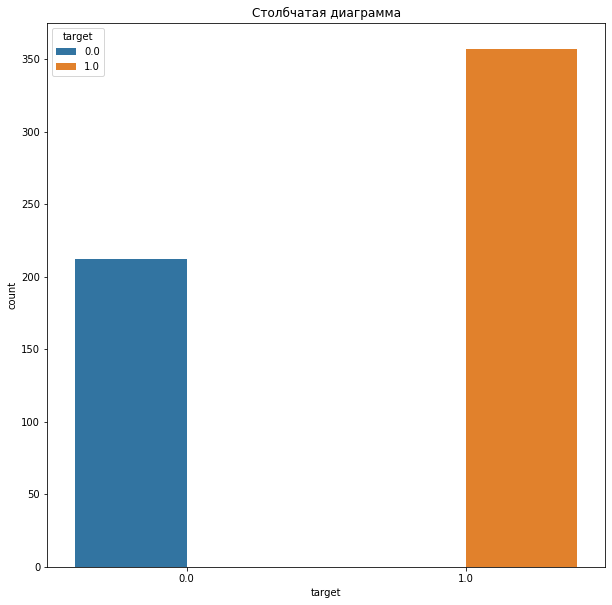

In [22]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.countplot(x=data1['target'],hue=data1['target'])
ax.set_title('Столбчатая диаграмма')

Этот график показывает, когда у человека есть опухоль, какой процент является злокачественным или доброкачественным, независимо от характеристик опухоли.

## Joinplot
Комбинация гистограмм и диаграмм рассеивания.

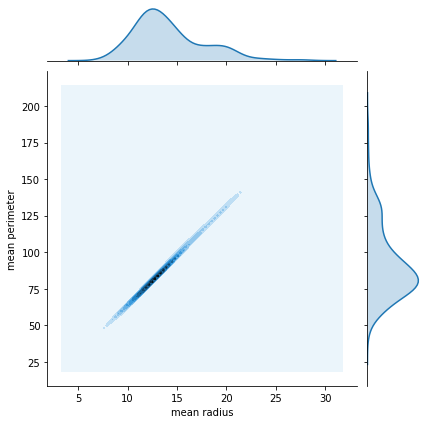

In [23]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='kde')

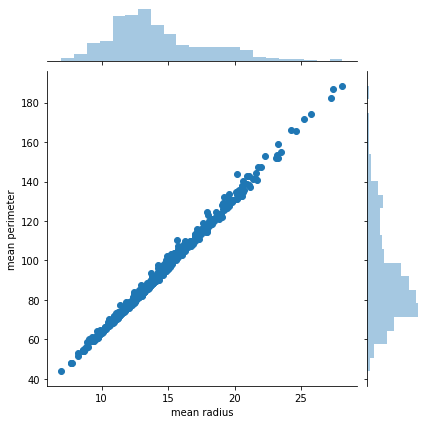

In [24]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='scatter')

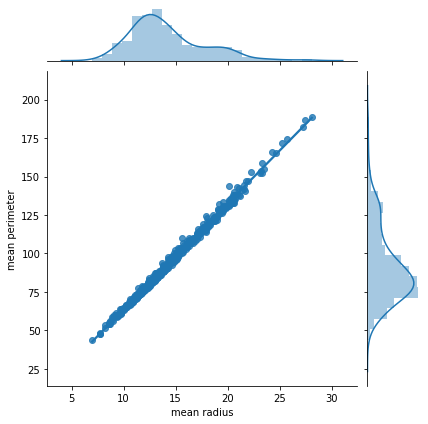

In [25]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='reg')

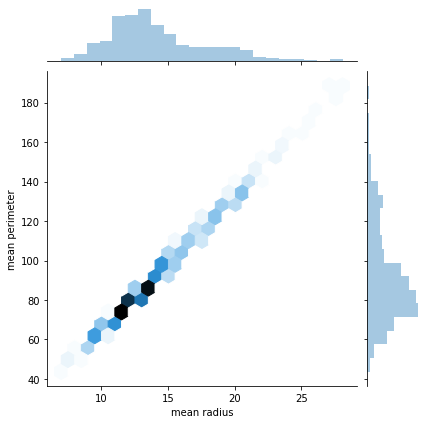

In [26]:
sns.jointplot(data1['mean radius'],data1['mean perimeter'],kind='hex')

## Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

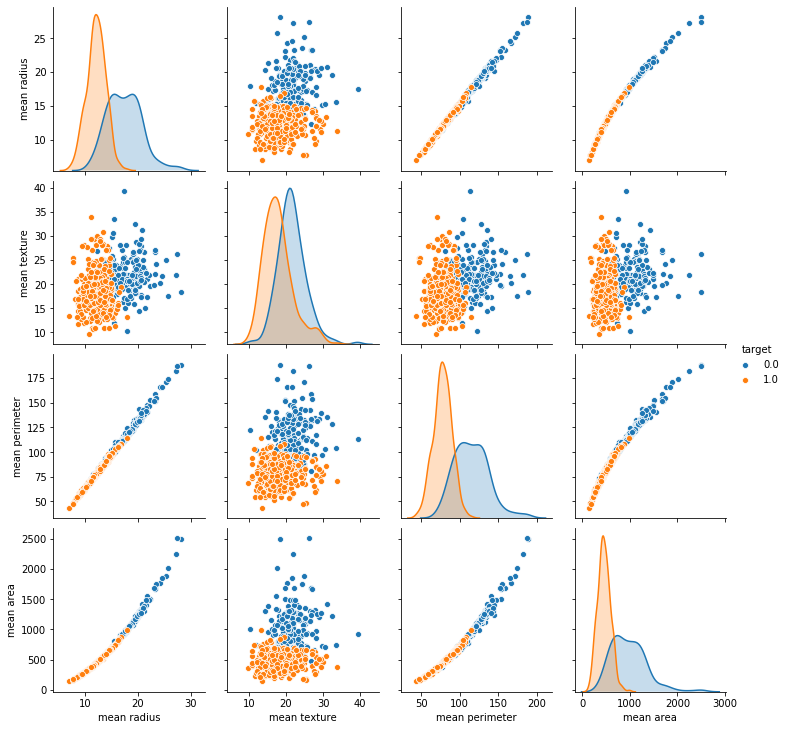

In [27]:
sns.pairplot(data1[['mean radius','mean texture','mean perimeter','mean area','target']],hue="target")

##  <font color=#1569C7> <u>Ящик с усами <u> </font>
Отображает одномерное распределение вероятности.

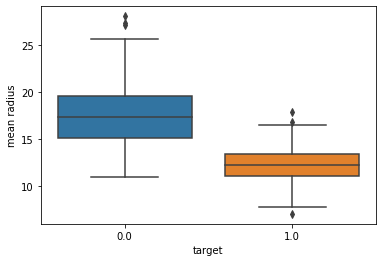

In [28]:
sns.boxplot(x='target', y='mean radius', data=data1)

мы можем видеть, что медиана "mean radius" доброкачественной опухоли меньше, чем медиана злокачественной, и это имеет смысл

##  <font color=#1569C7> <u>Violin plot <u> </font>
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности.

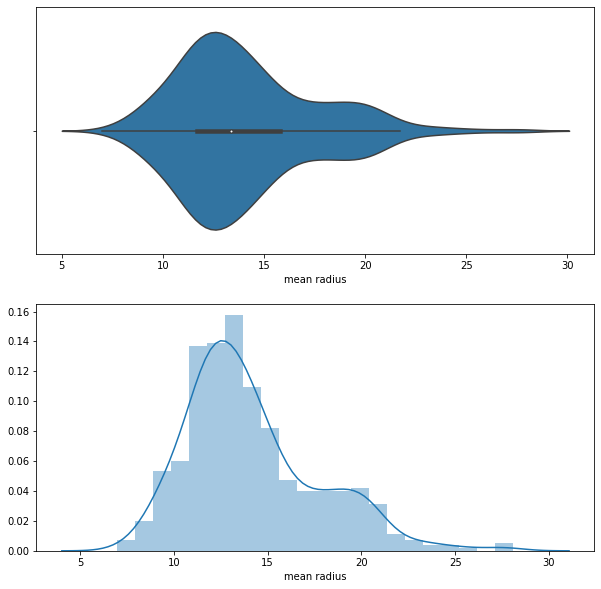

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['mean radius'])
sns.distplot(data1['mean radius'], ax=ax[1])

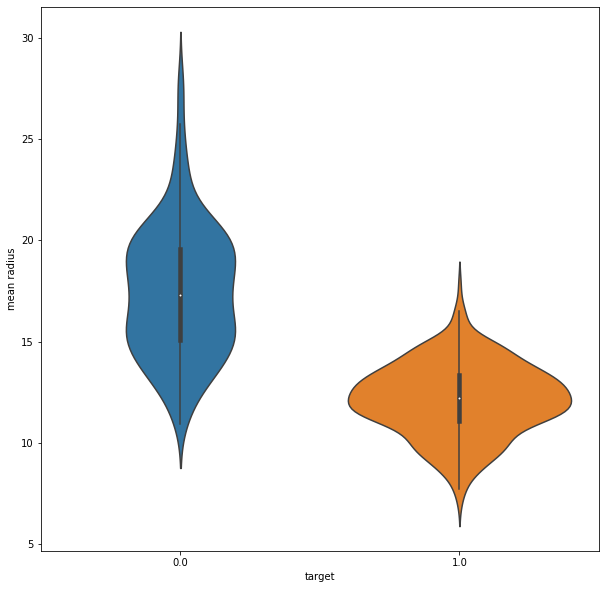

In [30]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
sns.violinplot(x=data1['target'], y=data1['mean radius'], data=data1)

# 4) Информация о корреляции признаков

In [31]:
data1.corr()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак наиболее сильно коррелирует с "worst concave points" (-0.794) и "worst perimeter" (-0.783). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с "mean compactness" (-0.597),"radius error" (-0.567),"concave points error" (-0.408) , "worst texture" (-0.547) ,"worst smoothness" (-0.421),"worst symmetry" (-0.416). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с "mean smoothness" (-0.359) , "mean symmetry" (-0.33) , "mean fractal dimension" (0.013) , "texture error" (0.008) , "smothness error" (0.067) , "Compactness error" (-0.293) , "concavity error" (-0.254) , "symmetry error" (0.007) , "fractal dimension error" (-0.078) и "worst fractal dimension" (-0.324). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
- "mean radius" и "mean perimeter" очень сильно коррелируют между собой (0.998). Это неудивительно, ведь mean perimeter величина производная от mean radius. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "mean radius" и ("mean area" (0.987), "worst radius" (0.969), "worst perimeter" (0.965), "worst area" (0.941))
- "mean texture" и "worst texture" очень сильно коррелируют между собой (0.912). Это неудивительно, ведь worst texture величина производная от mean texture. Поэтому из этих признаков в модели можно оставлять только один.
- "radius error" и "perimeter error" очень сильно коррелируют между собой (0.973). Это неудивительно, ведь perimeter error величина производная от radius error. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "radius error" и "area error" (0.952)
- "mean concavity" и "worst concave points" очень сильно коррелируют между собой (0.861). Это неудивительно, ведь mean concavity величина производная от worst concave points. Поэтому из этих признаков в модели можно оставлять только один.\
и то же самое между "worst concave points" и ("mean concave points" (0.910), "worst concavity" (0.855))
- "mean compactness" и "worst compactness" очень сильно коррелируют между собой (0.866). Это неудивительно, ведь mean compactness величина производная от worst compactness. Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из признаков ("mean radius","mean perimeter","mean area","worst radius","worst perimeter", "worst area") лучше выбрать "worst perimeter", потому что он сильнее коррелирован с целевым признаком (-0.783). Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.

<br><br><br>
В нашем случае набор данных имеет большое количество признаков, поэтому анализ числовой корреляционной матрицы становится неудобным.

Чтобы визуализировать матрицу корреляции, мы будем использовать тепловую карту тепловых карт, которая показывает степень корреляции в разных цветах.

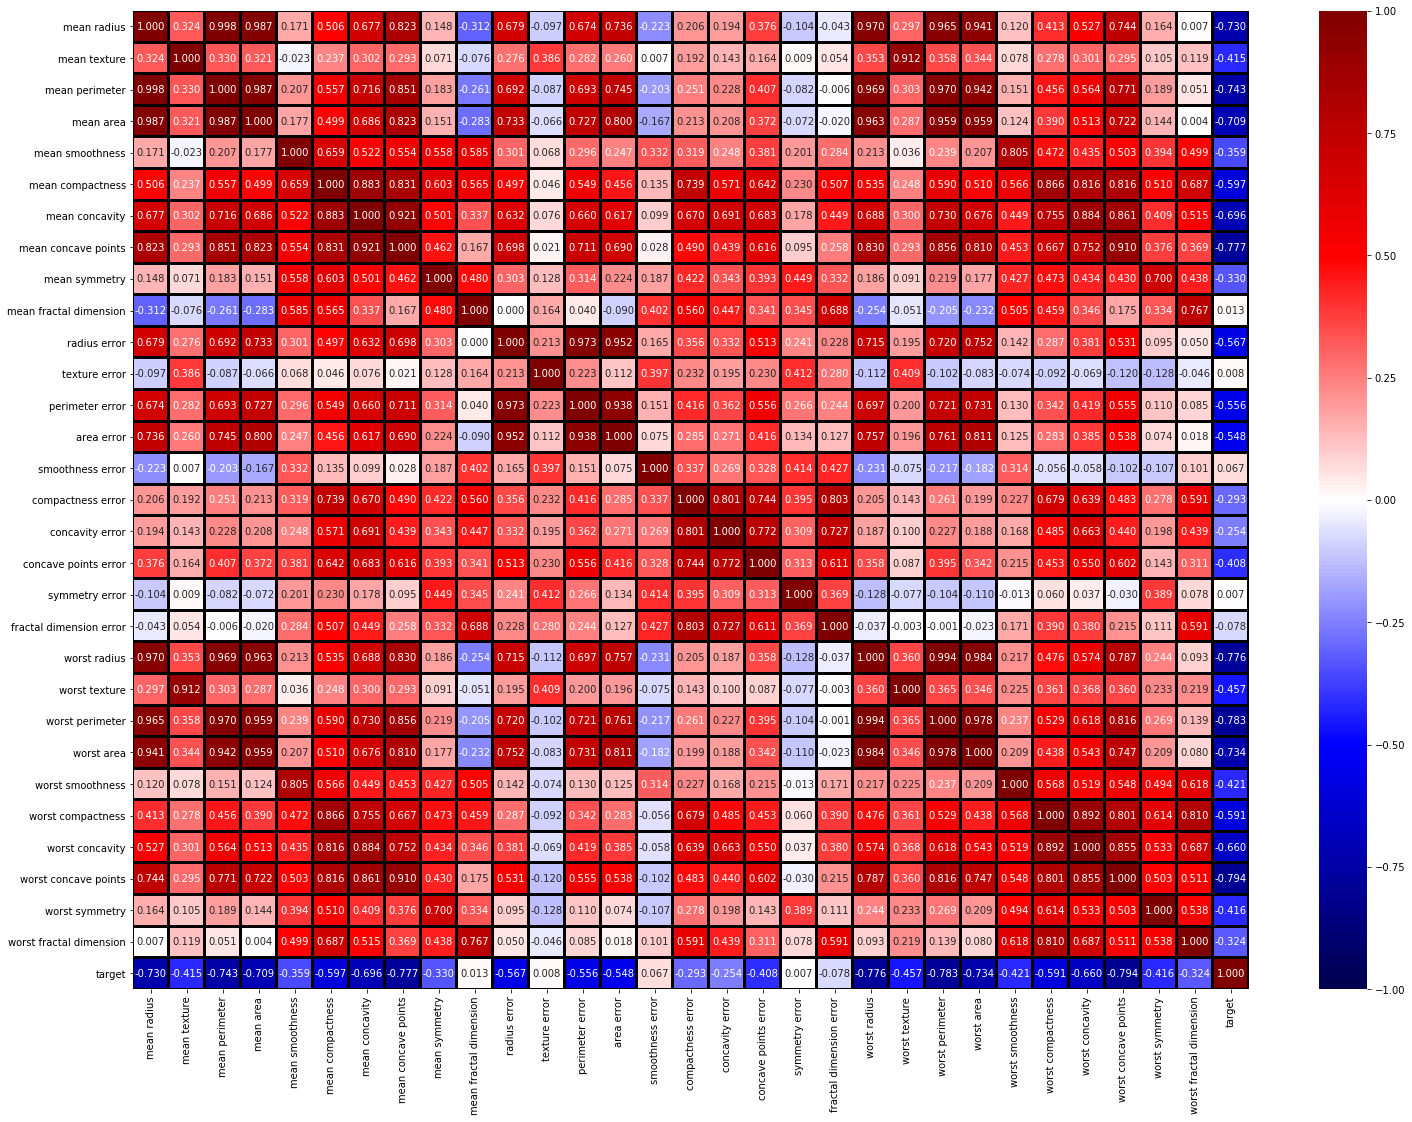

In [32]:
fig=plt.figure(figsize=(25,18))
ax=fig.gca()
sns.heatmap(data1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'seismic', linewidths=2, linecolor='black', fmt='.3f')

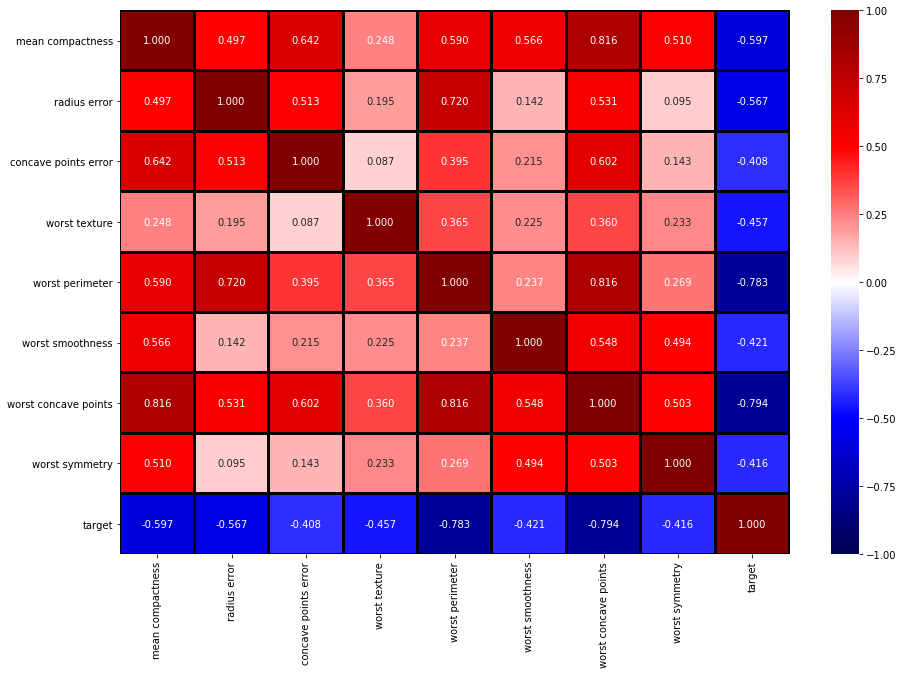

In [33]:
fig=plt.figure(figsize=(15,10))
ax=fig.gca()
sns.heatmap(data1[['mean compactness','radius error','concave points error','worst texture','worst perimeter','worst smoothness','worst concave points','worst symmetry','target']].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'seismic', linewidths=2, linecolor='black', fmt='.3f')